##Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

 ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
 
 Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}$$

$$a = \overline{y} - b \cdot {\overline{x}}$$

In [1]:
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [2]:
b = (np.mean(ks * zp) - np.mean(ks) * np.mean(zp)) / (np.mean(zp**2) - np.mean(zp)**2)
print(f'Коэффициент b линейного уровнения: {b}')

Коэффициент b линейного уровнения: 2.620538882402765


In [3]:
a = np.mean(ks) - b * np.mean(zp)
print(f'Коэффициент a линейного уровнения: {a}')

Коэффициент a линейного уровнения: 444.1773573243596


Уравнение регрессии будет иметь вид: $$y = 444.177 + 2.62 * x$$

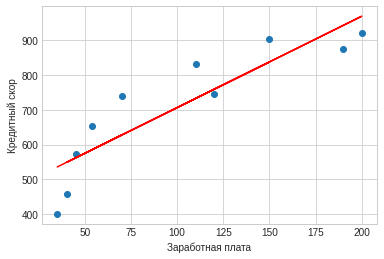

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скор')
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp, 'r')
plt.show()

Для нахождения коэффициента без intercept:

$$b = \frac{\overline{xy}}{\overline{x^2}}$$

In [5]:
b_nointer = np.mean(zp * ks) / np.mean(zp**2)
b_nointer

5.889820420132688

Уравнение: $$y = 5.89 \cdot x$$

Так же можно посчитать в матричном ввиде:

In [6]:
X = zp.reshape((10,1))
y = ks.reshape((10,1))

In [7]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
print(f'Коэффициент B линейного уровнения без интерсепта: {B[0][0]:0.2f}')

Коэффициент B линейного уровнения без интерсепта: 5.89


#Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [19]:
def mse_(B1, y = ks, X = zp, n = 10):
  return np.sum((B1 * X - y)**2) / n

In [34]:
#вводные
alpha = 1e-5
n = len(zp)
B1 = 0.1

In [35]:
for i in range(160):
  B1 -= alpha * (2 / n) * np.sum((B1 * zp - ks) * zp)
  if i % 20 == 0:
    print(f'Iter: {i} , B1 = {B1}, mse = {mse_(B1, n = n)}')

Iter: 0 , B1 = 1.6952808000000004, mse = 298904.5992334053
Iter: 20 , B1 = 5.883166639986514, mse = 56517.468344241344
Iter: 40 , B1 = 5.88980986526988, mse = 56516.858417254174
Iter: 60 , B1 = 5.889820403389555, mse = 56516.85841571941
Iter: 80 , B1 = 5.889820420106129, mse = 56516.8584157194
Iter: 100 , B1 = 5.889820420132646, mse = 56516.85841571941
Iter: 120 , B1 = 5.889820420132688, mse = 56516.8584157194
Iter: 140 , B1 = 5.889820420132688, mse = 56516.8584157194


##Задание 3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Если нам известна $\sigma$ используем таблицу Лапласа, если нет то Стьюдента